#**Part 1: Scikit-Learn**

In [ ]:
#part 2 preprocessing
#part 3 metrices
#part 4 meta estimators
#part 5 human learn

In [ ]:
#checking the version of scikit-learn
import sklearn
sklearn.__version__

'1.6.1'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing in-built dataset (Ames Housing Dataset) via OpenML

**Use Case**: House price prediction with many rich features (~80).

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [ ]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

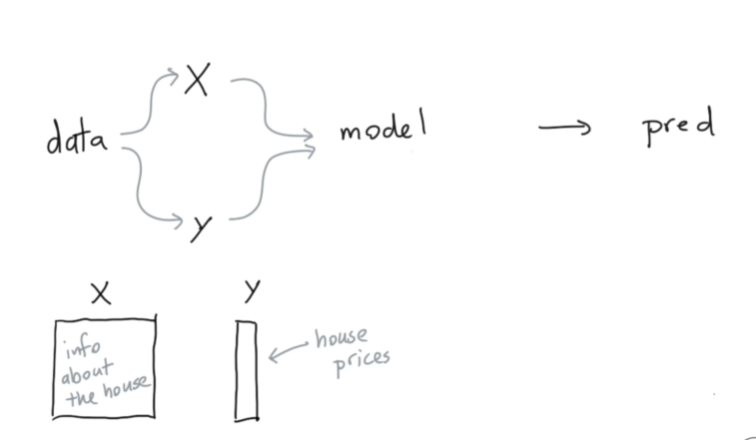

`as_frame=True`:

This tells scikit-learn to return the data as a pandas DataFrame (not just NumPy arrays).
This makes it easier to inspect column names and do EDA (Exploratory Data Analysis).

In [ ]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
x = data.data          # Features
print(x.head())        # View first few rows of features

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
y = data.target        # Target variable
print(y.head())        # View first few target values

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

###**KNeighborsRegressor**

####**1. What is K-Nearest Neighbors (KNN) ?**

KNN is a non-parametric, instance-based machine learning algorithm used for:

* **Classification** → `KNeighborsClassifier`

* **Regression** → `KNeighborsRegressor`


####**2. What is KNeighborsRegressor ?**

KNeighborsRegressor is a machine learning model that predicts a value by averaging the outputs of the `k` **nearest data points.**

* `n_neighbors=k`: how many neighbors to consider.

* It works based on **distance** (e.g., Euclidean).

* Used for **regression** tasks.

In [ ]:
model = KNeighborsRegressor()

In [ ]:
model.fit(x,y)

KNeighborsRegressor()

In [ ]:
pred = model.predict(x)
pred

array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

There a lot of other models

(eg: linearRegression)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(x,y)
# model.predict(x)

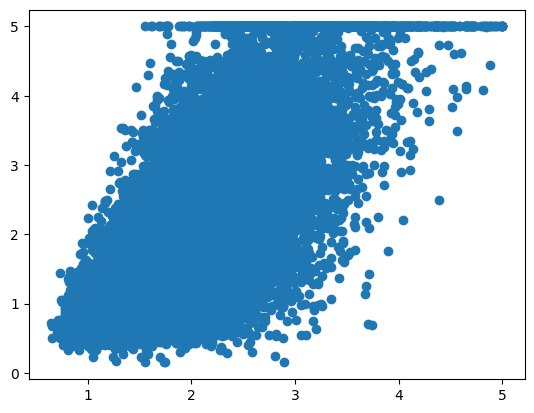

In [ ]:
plt.scatter(pred, y)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
mod = KNeighborsRegressor().fit(x, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

In [ ]:
pipe.fit(x, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [ ]:
pred = pipe.predict(x)

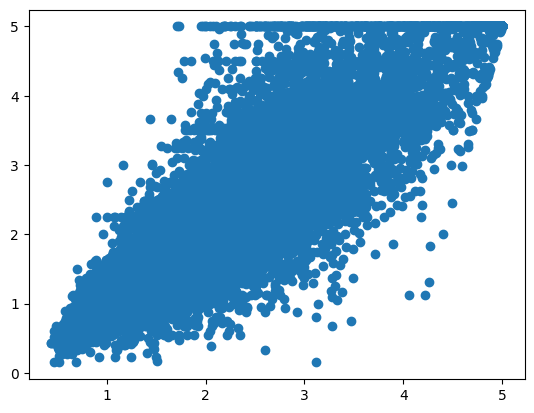

In [ ]:
plt.scatter(pred, y)
plt.show()

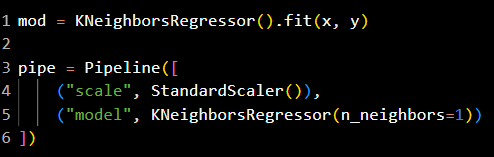

The `n_neighbors` parameter in KNeighborsRegressor defines how many nearest neighbors the model should consider when making a prediction.


Scatter Plot:

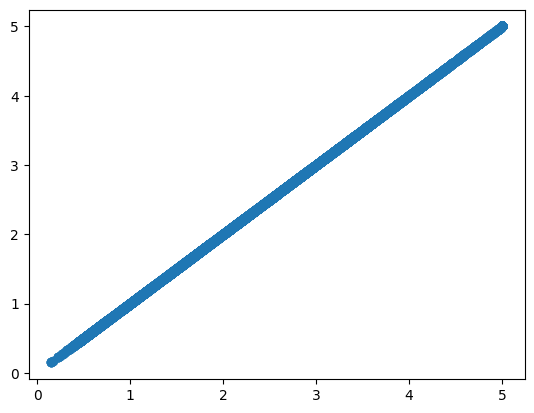

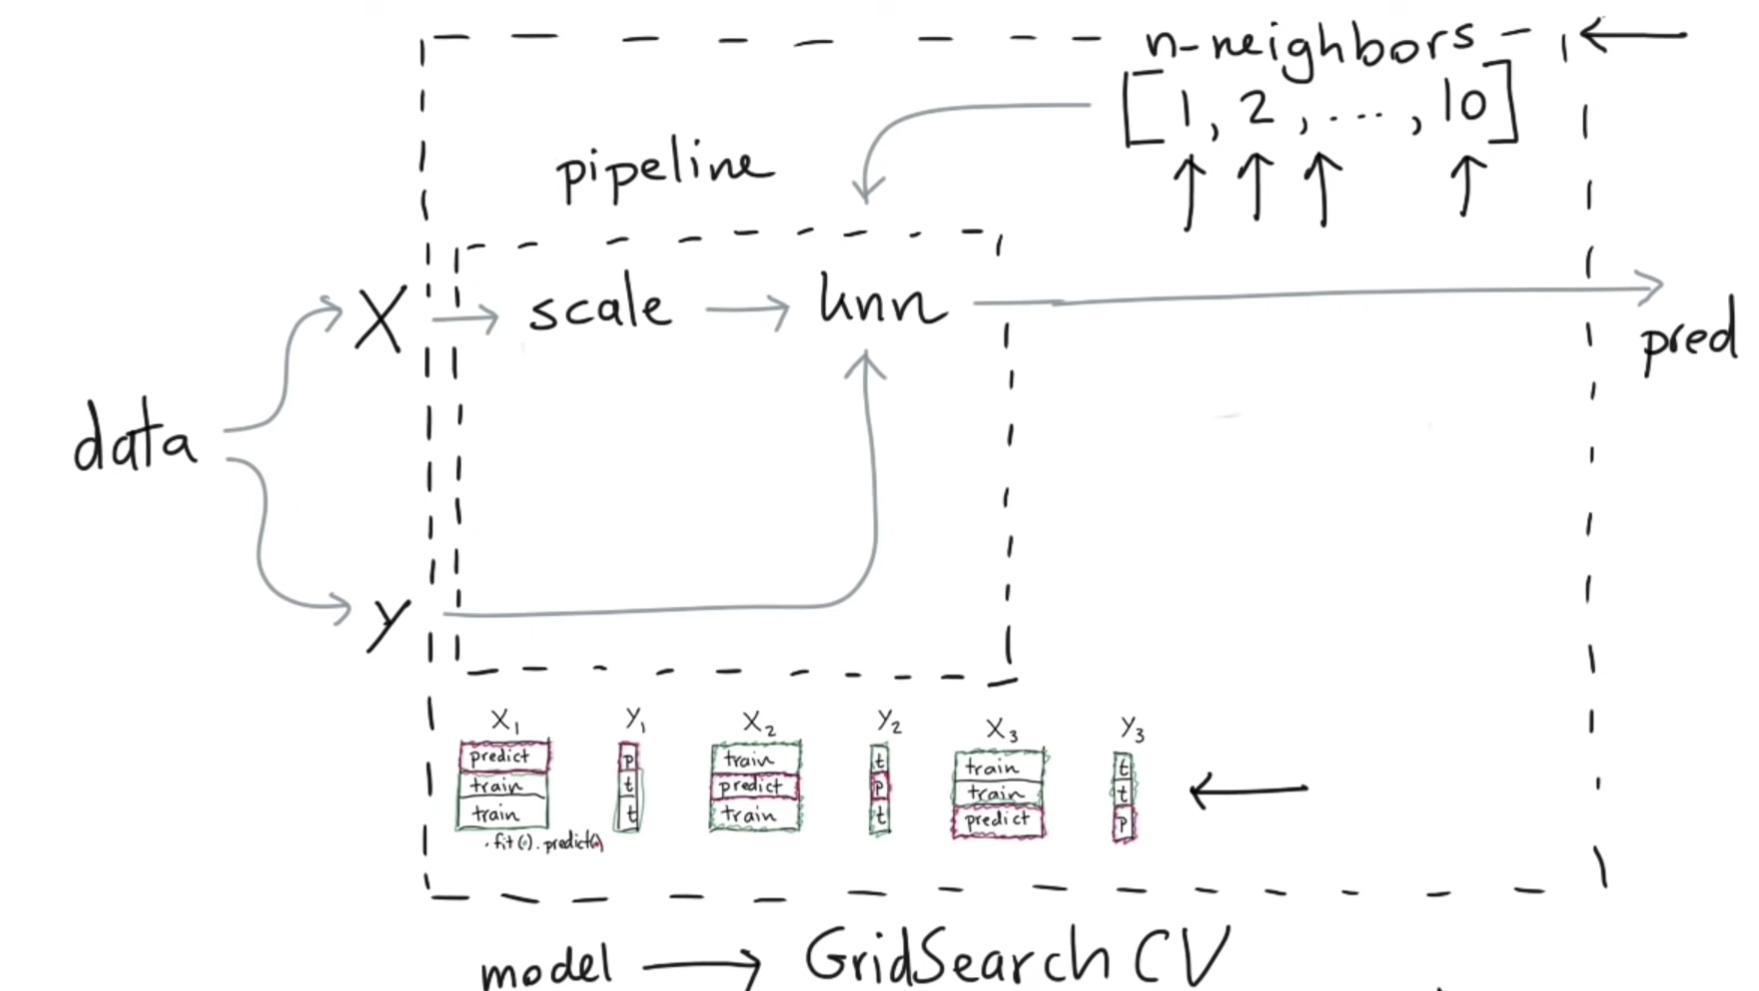

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
x, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [ ]:
mod = GridSearchCV(estimator=pipe,
             param_grid = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv = 3)

In [ ]:
mod.fit(x, y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018913,0.001652,0.384896,0.028893,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.017885,0.000087,0.440766,0.040941,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.017953,0.000064,0.464036,0.043683,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.018931,0.000156,0.521783,0.068104,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.028621,0.000387,0.858166,0.011410,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.033245,0.021800,0.677430,0.189418,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.018383,0.000337,0.554806,0.052601,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.025550,0.005319,0.941570,0.117916,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.020433,0.003327,0.575576,0.038173,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.017812,0.000016,0.713310,0.219865,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1
